# 1.3.3 예제 : 인구에 따른 살인 비율의 위치 추정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**2010년 미국 각 주별로 인구 10만명당 살인 비율**

In [2]:
state= pd.read_csv('./data/state.csv')

In [3]:
state.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
# 인구의 평균 구하기
state['Population'].mean()

6162876.3

**절사평균 : 크기 순으로 정렬한 후 양 끝에서 일정 개수의 값들을 삭제한 뒤 남은 값들을 가지고 구한 평균을 말한다.**

In [5]:
# trim = 0.1 인 절사평균을 구해보자. 
len(state['Population']) # state는 50개가 있고, 인구 데이터를 크기 순으로 정렬한 후 양쪽에서 0.1의 비율 즉 5개씩을 제외하고 남은 값들의 평균을 구해야한다.
sorted_pop = sorted(state['Population'].tolist())
trim_1_of_mean = np.mean(sorted_pop[5:-5])
print(trim_1_of_mean)

4783697.125


In [6]:
from scipy import stats
stats.trim_mean(state['Population'],0.1)

4783697.125

**가중평균 : 주마다 인구수(Population)이 다르기 때문에 미국 전체의 MurderRate를 구할때 단순히 더한값을 50(주의 개수)로 나누는것이 아니라, 인구수에 가중치를 주어야한다.**

In [7]:
# Murder.Rate의 정의는 Murder.Rate = (실제 살인사건 발생률 / 주의 인구수)*10만 미국 전체의 인구 10만명당 살인 사건을 구하기 위해서는
# 각 주의 범죄율에 각 주의 인구수를 곱하고 전체 미국의 인구수를 나누어준 값을 더해야한다.
state['Population_Rate'] = state['Population']/state['Population'].sum()

In [8]:
sum(state['Murder.Rate']*state['Population_Rate'])

4.445833981123394

# 1.4.3 예제 : 주별 인구의 변이 추정

**표준편차, 사분위 범위(IQR), 중위 절대편차(MAD) 구하기**

In [9]:
state['Population'].std() # 표준편차
IQR=state['Population'].quantile(0.75)-state['Population'].quantile(0.25)
print(IQR)

4847308.0


In [10]:
# 중위 절대 편차(MAD)
pop_med = state['Population'].median() # 인구의 중간값
abs_pop_minus_med = abs(state['Population']-4436369.5) # 인구데이터에서 중간값을 뺀 값들의 절대값
abs_pop_minus_med.median() # 이 값은 c=1이라는 파라미터를 설정해주어야만한다. 

2596702.0

In [11]:
import statsmodels.robust
statsmodels.robust.scale.mad(state['Population'],c=0.6744897501960817) # default c값은 c=0.6744897501960817 이다. 

3849876.1459979336

In [12]:
statsmodels.robust.scale.mad(state['Population'],c=1)

2596702.0

In [13]:
# c=1 이라는 파라미터의 의미는? 가우시안 분포를 따를 때 c=0.6745라는 디폴트 값을 넣어서 계산하도록 한다. 

**로버스트의 사전적 의미는 '건장한' 이지만 통계학에서는 다른 이상치나, 에러값이 있어도 영향을 크게 받지 않는 통계량을 의미한다.**

In [14]:
zeroto18 = np.arange(0,20,2)
print(zeroto18) 
data = np.append(zeroto18,100) # 100이라는 특이값을 추가 해주기
statsmodels.robust.scale.mad(zeroto18)
statsmodels.robust.scale.mad(data)

[ 0  2  4  6  8 10 12 14 16 18]


8.895613311033612

In [15]:
zeroto18.std()

5.744562646538029

In [16]:
data.std()

26.727891149307982

# 1.5.1 백분위수와 상자그림

In [17]:
state['Murder.Rate'].quantile([0.05,0.10,0.5,0.75,0.9])

0.05    1.60
0.10    1.89
0.50    4.00
0.75    5.55
0.90    6.01
Name: Murder.Rate, dtype: float64

Text(0.5, 0, 'Population (millions)')

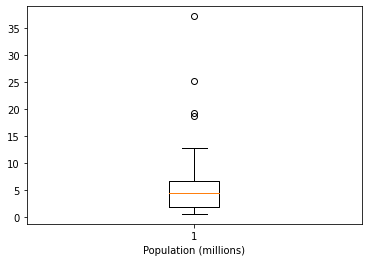

In [18]:
# 상자그림 
plt.boxplot(state['Population']/1_000_000)
plt.xlabel('Population (millions)')

# 1.5.2 도수 분포표와 히스토그램

(array([24., 14.,  6.,  2.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([  563626.,  4232659.,  7901692., 11570725., 15239758., 18908791.,
        22577824., 26246857., 29915890., 33584923., 37253956.]),
 <BarContainer object of 10 artists>)

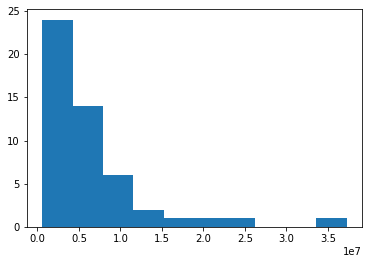

In [19]:
plt.hist(state['Population'],bins=10) # 히스토그램

# 1.5.3 밀도 그림과 추정

Text(0.5, 0, 'Murder Rate (per 100,000)')

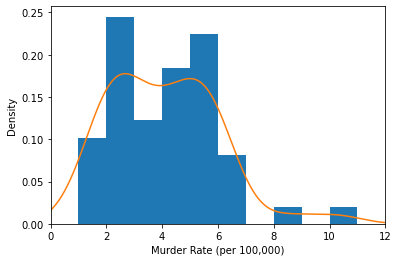

In [20]:
# 밀도 곡선의 부드러움을 제어하기 위해서 bw_method 인수 사용
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12)) # histogram
state['Murder.Rate'].plot.density(ax=ax) # Density
ax.set_xlabel('Murder Rate (per 100,000)')

# 1.6 이진 데이터와 범주 데이터 탐색하기

In [21]:
# 댈러스 포트워스 공항의 항공기 운행 지연 원인별 퍼센트 비율
dalayed_reason = {'Carrier':23.02, 'ATC':30.40, 'Weather': 4.03, 'Security':0.12, 'Inbound':42.43}

In [22]:
dalayed_reason_df = pd.DataFrame(dalayed_reason,index=['percent']).transpose()
dalayed_reason_df=dalayed_reason_df.reset_index()

In [23]:
dalayed_reason_df

,index,percent
0,Carrier,23.02
1,ATC,30.40
2,Weather,4.03
3,Security,0.12
4,Inbound,42.43


**항공기 운행이 지연된 원인별 퍼센트 비율은 범주형 데이터이다**

Text(0.5, 1.0, 'Cause of Delay')

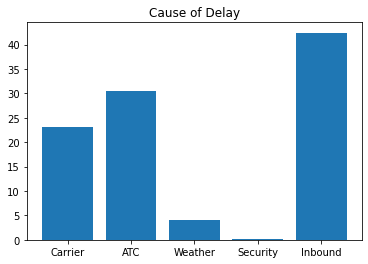

In [24]:
# 범주별로 바그래프를 그려서 분포를 나타낸다.
plt.bar(dalayed_reason_df['index'],dalayed_reason_df['percent'])
plt.title('Cause of Delay')

# 1.7 상관관계

In [25]:
iris_df = pd.read_csv('./data/iris_train.csv')
iris_df.head(10)
iris_df_features = iris_df.iloc[:,2:]

<AxesSubplot:>

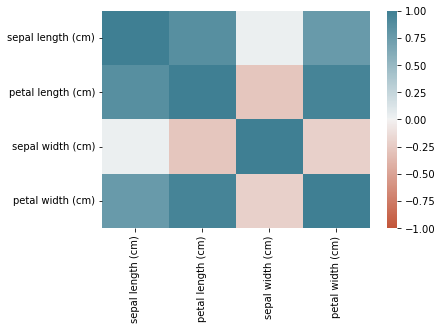

In [29]:
import seaborn as sns
# 히트맵 ( 상관관계를 시각화 )
sns.heatmap(iris_df_features.corr(), vmin=-1, vmax=1, 
           cmap=sns.diverging_palette(20,220,as_cmap=True))

**petal length와 sepal length, petal width와 sepal length와 강한 상관관계를 갖는다**

# 1.7.1 산점도

Text(0, 0.5, 'petal lenght (cm)')

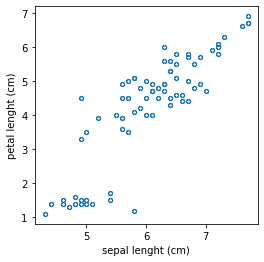

In [30]:
# 두 변수 사이의 관계를 시각화 (산점도)
ax = iris_df.plot.scatter(x='sepal length (cm)',y='petal length (cm)', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('sepal lenght (cm)')
ax.set_ylabel('petal lenght (cm)')

# 1.8 두 개 이상의 변수 탐색하기 (다변량변수:셋 이상의 변수)

Text(0, 0.5, 'petal lenght (cm)')

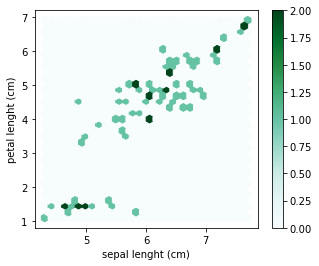

In [32]:
# 육각형 구간과 등고선
# 두 변수 사이의 관계를 시각화 (산점도)
ax = iris_df.plot.hexbin(x='sepal length (cm)',y='petal length (cm)',
                          gridsize=30, sharex=False,figsize=(5,4))
ax.set_xlabel('sepal lenght (cm)')
ax.set_ylabel('petal lenght (cm)')

In [45]:
# 1.8.2 범주형 변수 Vs 범주형 변수 

In [46]:
stroke_df = pd.read_csv('./data/stroke.csv')
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


**결혼여부와 고혈압간의 상관관계를 알아보도록하자**

In [58]:
crosstab = stroke_df[['hypertension','ever_married']].pivot_table(index='hypertension',
                                                                  columns='ever_married',
                                                                  aggfunc=lambda x:len(x),
                                                                  margins=True) # 합을 나타내는 칼럼 유무

In [59]:
crosstab

ever_married,No,Yes,All
hypertension,,,
0,1704,2908,4612
1,53,445,498
All,1757,3353,5110


**결혼 유무와 고혈압간의 상관관계를 알기 위해서는 어떤 계산식을 써야할까?**

In [69]:
print('결혼하지 않은 사람들(1757명)중에서 고혈압(53명)인 사람의 비율',crosstab.loc[1,'No']/crosstab.loc['All','No'])
print('결혼한 사람들(3353명)중에서 고혈압(445명)인 사람의 비율',crosstab.loc[1,'Yes']/crosstab.loc['All','Yes'])

결혼하지 않은 사람들(1757명)중에서 고혈압(53명)인 사람의 비율 0.03016505406943654
결혼한 사람들(3353명)중에서 고혈압(445명)인 사람의 비율 0.13271696987772144


**결혼한 사람들 중에서 고혈압을 앓고 있는 사람이 훨씬 많음을 알 수 있다.(약 4배)**

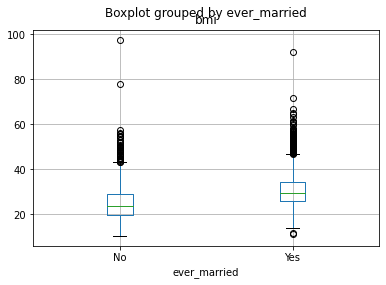

In [74]:
# 범주형 변수 vs 수치형 변수 (상자그림)

ax = stroke_df.boxplot(by='ever_married', column='bmi')

**결혼여부(ever_married)에 따른 비만도(bmi)의 분포를 상자그림으로 살펴보면, 평균 bmi가 결혼을 한 그룹에서 더 놉게 나타났고, 75% 도 결혼을 한 그룹에서 더 높다는 것을 알 수 있다. 결혼을 하면 함께하면서 더 맛있는 것을 많이 먹기 때문일까?**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


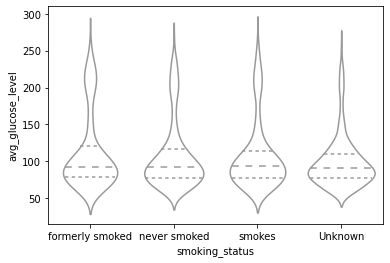

In [76]:
# 바이올린 도표(밀도 추정 결과를 동시에 시각화 한다.)
# 흡연 (smoking_status) 결과에 따른 체내 글루코스 양 (avg_glucose_level)을 바이올린 도표로 그려보자
ax = sns.violinplot(stroke_df.smoking_status,stroke_df.avg_glucose_level,
                   inner = 'quartile', color='white')

**흡연 여부에 따른 글루코스양은 별 차이가 없는 것 같다.**